In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,LSTM

In [113]:
df = web.DataReader('AAPL' ,data_source="yahoo",start= '2010-1-1' , end = '2019-12-17')
print(df.head())
print(df.info())
print(df.describe())

                High       Low      Open     Close       Volume  Adj Close
Date                                                                      
2010-01-04  7.660714  7.585000  7.622500  7.643214  493729600.0   6.562591
2010-01-05  7.699643  7.616071  7.664286  7.656429  601904800.0   6.573935
2010-01-06  7.686786  7.526786  7.656429  7.534643  552160000.0   6.469369
2010-01-07  7.571429  7.466071  7.562500  7.520714  477131200.0   6.457407
2010-01-08  7.571429  7.466429  7.510714  7.570714  447610800.0   6.500339
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2507 entries, 2010-01-04 to 2019-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2507 non-null   float64
 1   Low        2507 non-null   float64
 2   Open       2507 non-null   float64
 3   Close      2507 non-null   float64
 4   Volume     2507 non-null   float64
 5   Adj Close  2507 non-null   float64
dtypes: float64(6)
memory usage

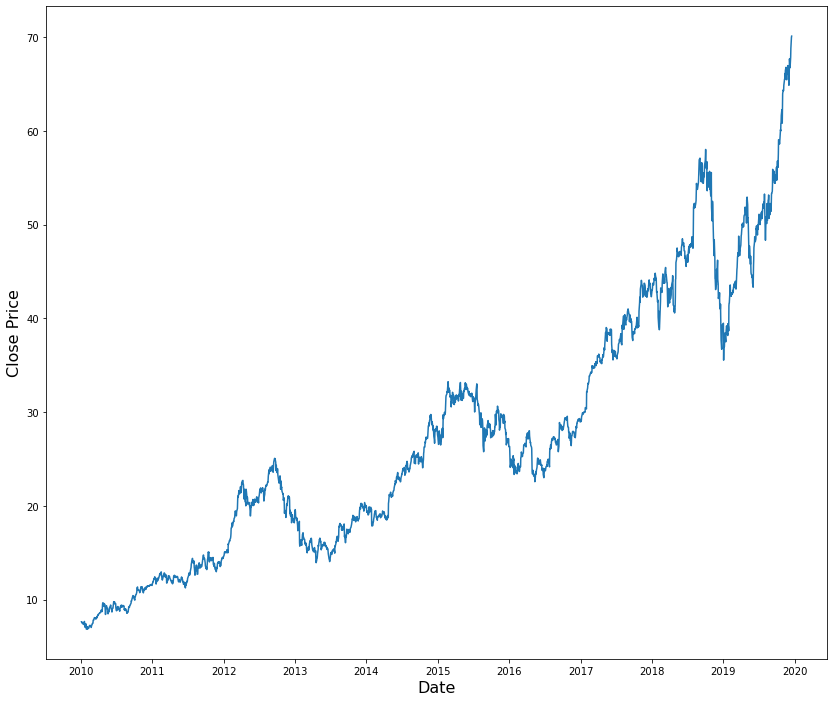

In [114]:
plt.figure(figsize=(14,12))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close Price',fontsize=16)
plt.plot(df['Close'])
plt.show()

In [177]:
closeDF= df.filter(['Close'])
closeData=closeDF.values
maxVal=max(closeData)
trainingSize =int( 0.7 * len(closeData) )
testSize = len(closeData) - trainingSize

trainData = closeData[:trainingSize]
trainData = trainData/maxVal 

testData=closeData[trainingSize:]
testData =testData/maxVal

def Create_sets(Data):
    X=[]
    y=[]
    i=0 
    while(i<len(Data)):
        if(i+60 < len(Data)):
            tempX= Data[i:i+60]
            tempy= Data[i+60]
        X.append(tempX)
        y.append(tempy)
        i =i+1
    X,y =np.array(X),np.array(y)
    return X,y

X_train,y_train=Create_sets(trainData)   

X_test,y_test=Create_sets(testData)    




In [178]:
model =Sequential() 
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [179]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [180]:
model.fit(X_train,y_train,epochs=50,batch_size=30)


Epoch 1/50
59/59 [==============================] - 6s 30ms/step - loss: 0.0056
Epoch 2/50
59/59 [==============================] - 2s 30ms/step - loss: 2.1901e-04
Epoch 3/50
59/59 [==============================] - 2s 29ms/step - loss: 2.1443e-04
Epoch 4/50
59/59 [==============================] - 2s 30ms/step - loss: 2.2479e-04
Epoch 5/50
59/59 [==============================] - 2s 30ms/step - loss: 2.0363e-04
Epoch 6/50
59/59 [==============================] - 2s 30ms/step - loss: 1.8859e-04
Epoch 7/50
59/59 [==============================] - 2s 30ms/step - loss: 1.9159e-04
Epoch 8/50
59/59 [==============================] - 2s 29ms/step - loss: 1.8028e-04
Epoch 9/50
59/59 [==============================] - 2s 30ms/step - loss: 1.6447e-04
Epoch 10/50
59/59 [==============================] - 2s 30ms/step - loss: 1.7846e-04
Epoch 11/50
59/59 [==============================] - 2s 30ms/step - loss: 1.5563e-04
Epoch 12/50
59/59 [==============================] - 2s 30ms/step - loss: 1.76

In [181]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [188]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.008393437202837736
0.03496850110706287


<ipython-input-196-dc1c8e0c526f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TrainingData['test']= train_predict *maxVal
<ipython-input-196-dc1c8e0c526f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData['test'] = test_predict*maxVal


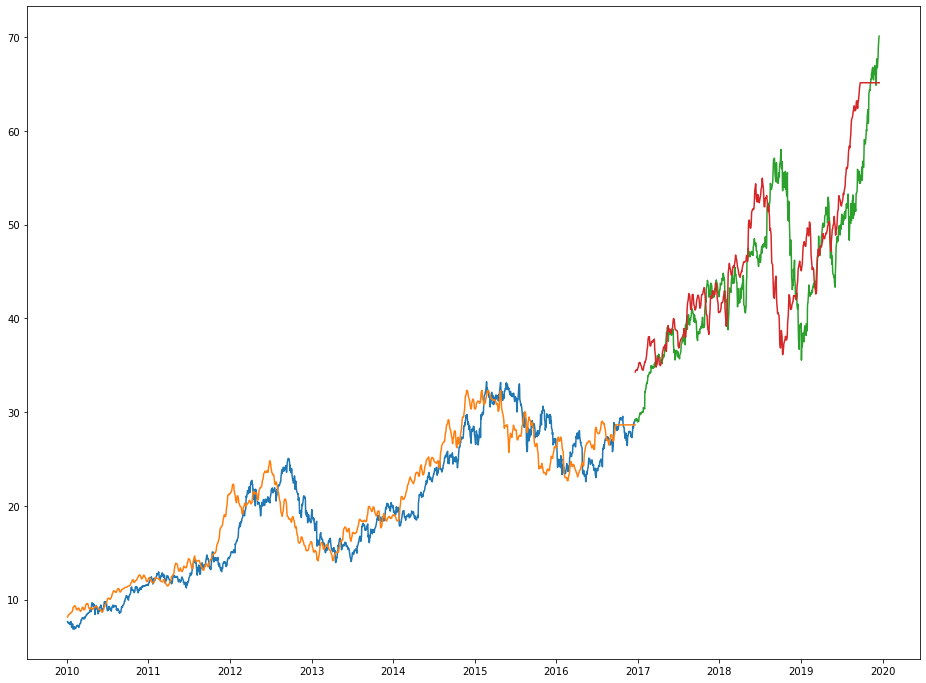

In [196]:
TrainingData= df[:trainingSize]
TrainingData['test']= train_predict *maxVal

TestData= df[trainingSize:]
TestData['test'] = test_predict*maxVal
plt.figure(figsize=(16,12))
plt.plot(TrainingData[['Close','test']])
plt.plot(TestData[['Close','test']])

